In [127]:
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
#from lightgbm import LGBMRegressor
import re

In [103]:
data1 = pd.read_csv('sales_train_validation_afcs2021.csv')
data1.head()

,id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,FOODS_3_001_TX_3_validation,0,2,1,3,0,0,1,0,2,...,0,0,0,0,2,0,0,5,2,0
1,FOODS_3_002_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,FOODS_3_003_TX_3_validation,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
3,FOODS_3_004_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
4,FOODS_3_005_TX_3_validation,0,1,1,0,0,1,2,0,0,...,0,4,2,1,1,0,1,0,4,0


In [102]:
data2 = pd.read_csv('sales_test_validation_afcs2021.csv')
data2.head()

,id,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,FOODS_3_001_TX_3_validation,1,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,FOODS_3_002_TX_3_validation,0,0,0,0,0,0,0,0,0,...,2,0,0,2,1,0,3,1,1,1
2,FOODS_3_003_TX_3_validation,0,0,1,0,0,0,0,0,1,...,2,0,2,1,0,2,0,0,2,1
3,FOODS_3_004_TX_3_validation,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,FOODS_3_005_TX_3_validation,1,1,2,0,2,0,2,1,4,...,1,0,1,1,1,2,4,2,1,3


In [138]:
data3 = pd.read_csv('test_forecast.csv')
data3.head()

,id,d_1942,d_1943,d_1944,d_1945,d_1946,d_1947,d_1948,d_1949,d_1950,...,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
0,FOODS_3_001_TX_3_validation,1,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,FOODS_3_002_TX_3_validation,0,0,0,0,0,0,0,0,0,...,2,0,0,2,1,0,3,1,1,1
2,FOODS_3_003_TX_3_validation,0,0,1,0,0,0,0,0,1,...,2,0,2,1,0,2,0,0,2,1
3,FOODS_3_004_TX_3_validation,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,FOODS_3_005_TX_3_validation,1,1,2,0,2,0,2,1,4,...,1,0,1,1,1,2,4,2,1,3


In [104]:
data = pd.merge(data1, data2, left_on = "id", right_on = "id")
data.head()

,id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,FOODS_3_001_TX_3_validation,0,2,1,3,0,0,1,0,2,...,1,0,0,0,0,0,0,0,1,0
1,FOODS_3_002_TX_3_validation,0,0,0,0,0,0,0,0,0,...,2,0,0,2,1,0,3,1,1,1
2,FOODS_3_003_TX_3_validation,0,0,0,0,0,0,0,0,0,...,2,0,2,1,0,2,0,0,2,1
3,FOODS_3_004_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,FOODS_3_005_TX_3_validation,0,1,1,0,0,1,2,0,0,...,1,0,1,1,1,2,4,2,1,3


In [139]:
data = pd.merge(data, data3, left_on = "id", right_on = "id")
data.head()

,id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
0,FOODS_3_001_TX_3_validation,0,2,1,3,0,0,1,0,2,...,1,0,0,0,0,0,0,0,1,0
1,FOODS_3_002_TX_3_validation,0,0,0,0,0,0,0,0,0,...,2,0,0,2,1,0,3,1,1,1
2,FOODS_3_003_TX_3_validation,0,0,0,0,0,0,0,0,0,...,2,0,2,1,0,2,0,0,2,1
3,FOODS_3_004_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,FOODS_3_005_TX_3_validation,0,1,1,0,0,1,2,0,0,...,1,0,1,1,1,2,4,2,1,3


In [140]:
melt = data.melt(id_vars="id", var_name = "Day", value_name = "Sales")

In [141]:
melt["Day"] = melt["Day"].str.extract('(\d+)', expand = False).astype(int)

In [142]:
#melt['id'] = melt['id'].str.extract(pat = "_(.*?)_").astype(int)
melt["id"] = melt["id"].str.split('_').str[2].astype(int)

In [143]:
melt = melt.sort_values(["Day", "id"])

In [144]:
melt.head()

,id,Day,Sales
0,1,1,0
1,2,1,0
2,3,1,0
3,4,1,0
4,5,1,0


In [145]:
melt2 = melt.copy()
melt2['Last_Week_Sales'] = melt2.groupby(['id'])['Sales'].shift()
melt2['Last_Week_Diff'] = melt2.groupby(['id'])['Last_Week_Sales'].diff()
melt2 = melt2.dropna()
melt2.head()

,id,Day,Sales,Last_Week_Sales,Last_Week_Diff
1646,1,3,1,2.0,2.0
1647,2,3,0,0.0,0.0
1648,3,3,0,0.0,0.0
1649,4,3,0,0.0,0.0
1650,5,3,1,1.0,1.0


In [146]:
melt2

,id,Day,Sales,Last_Week_Sales,Last_Week_Diff
1646,1,3,1,2.0,2.0
1647,2,3,0,0.0,0.0
1648,3,3,0,0.0,0.0
1649,4,3,0,0.0,0.0
1650,5,3,1,1.0,1.0
...,...,...,...,...,...
1620482,823,1969,1,0.0,-1.0
1620483,824,1969,0,0.0,-2.0
1620484,825,1969,3,0.0,0.0
1620485,826,1969,2,6.0,6.0


In [128]:
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_error(ytrue, ypred))

In [147]:
mean_error = []
for week in range(1942,1970):
    train = melt2[melt2['Day'] < week]
    val = melt2[melt2['Day'] == week]

    p = val['Last_Week_Sales'].values

    error = rmsle(val['Sales'].values, p)
    print('Week %d - Error %.5f' % (week, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Week 1942 - Error 4.08432
Week 1943 - Error 3.03383
Week 1944 - Error 3.30396
Week 1945 - Error 2.73451
Week 1946 - Error 3.72082
Week 1947 - Error 2.81314
Week 1948 - Error 3.47286
Week 1949 - Error 3.89878
Week 1950 - Error 2.86386
Week 1951 - Error 3.18143
Week 1952 - Error 2.92286
Week 1953 - Error 3.34326
Week 1954 - Error 4.17101
Week 1955 - Error 3.89519
Week 1956 - Error 3.81896
Week 1957 - Error 3.64943
Week 1958 - Error 3.08703
Week 1959 - Error 3.14552
Week 1960 - Error 3.36482
Week 1961 - Error 3.01031
Week 1962 - Error 3.93276
Week 1963 - Error 3.89551
Week 1964 - Error 2.67203
Week 1965 - Error 2.86662
Week 1966 - Error 2.75288
Week 1967 - Error 3.96215
Week 1968 - Error 3.24908
Week 1969 - Error 3.85049
Mean Error = 3.38205


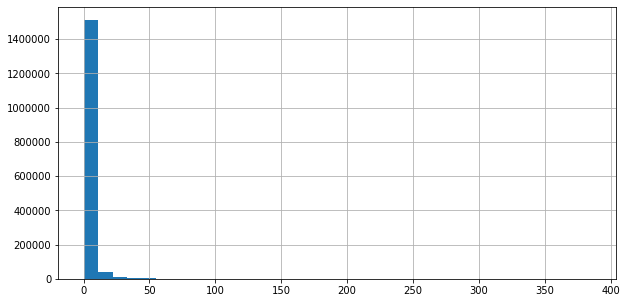

In [92]:
melt2['Sales'].hist(bins=35, figsize=(10,5))

In [130]:
from statsmodels.tsa.ar_model import AutoReg

In [132]:
mean_error = []
for week in range(1914,1942):
    train = melt2[melt2['Day'] < week]
    val = melt2[melt2['Day'] == week]

    xtr, xts = train.drop(['Sales'], axis=1), val.drop(['Sales'], axis=1)
    ytr, yts = train['Sales'].values, val['Sales'].values

    mdl = RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=0)
    #mdl = AutoReg(lags=1)
    mdl.fit(xtr, ytr)
    #mdl.fit(xtr, ytr)

    p = mdl.predict(xts)

    error = rmsle(yts, p)
    print('Week %d - Error %.5f' % (week, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Week 1914 - Error 3.15231
Week 1915 - Error 3.32897
Week 1916 - Error 2.78593
Week 1917 - Error 3.20430
Week 1918 - Error 3.45660
Week 1919 - Error 3.11347
Week 1920 - Error 3.37116
Week 1921 - Error 3.62497
Week 1922 - Error 3.22943
Week 1923 - Error 2.91266
Week 1924 - Error 2.90312
Week 1925 - Error 3.10899
Week 1926 - Error 4.46039
Week 1927 - Error 3.88109
Week 1928 - Error 3.95414
Week 1929 - Error 3.97978
Week 1930 - Error 3.21845
Week 1931 - Error 3.05168
Week 1932 - Error 3.17178
Week 1933 - Error 2.97702
Week 1934 - Error 3.70253
Week 1935 - Error 3.33571
Week 1936 - Error 3.05688
Week 1937 - Error 3.22608
Week 1938 - Error 2.68888
Week 1939 - Error 3.72599
Week 1940 - Error 3.28231
Week 1941 - Error 4.01893
Mean Error = 3.35441


In [148]:
melt3 = melt.copy()
melt3['Last_Week_Sales'] = melt3.groupby(['id'])['Sales'].shift()
melt3['Last_Week_Diff'] = melt3.groupby(['id'])['Last_Week_Sales'].diff()
melt3['Last-1_Week_Sales'] = melt3.groupby(['id'])['Sales'].shift(2)
melt3['Last-1_Week_Diff'] = melt3.groupby(['id'])['Last-1_Week_Sales'].diff()
melt3 = melt3.dropna()
melt3.head()

,id,Day,Sales,Last_Week_Sales,Last_Week_Diff,Last-1_Week_Sales,Last-1_Week_Diff
2469,1,4,3,1.0,-1.0,2.0,2.0
2470,2,4,0,0.0,0.0,0.0,0.0
2471,3,4,0,0.0,0.0,0.0,0.0
2472,4,4,0,0.0,0.0,0.0,0.0
2473,5,4,0,1.0,0.0,1.0,1.0


In [134]:
mean_error = []
for week in range(1914,1942):
    train = melt3[melt3['Day'] < week]
    val = melt3[melt3['Day'] == week]

    xtr, xts = train.drop(['Sales'], axis=1), val.drop(['Sales'], axis=1)
    ytr, yts = train['Sales'].values, val['Sales'].values

    mdl = RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)

    p = mdl.predict(xts)

    error = rmsle(yts, p)
    print('Week %d - Error %.5f' % (week, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Week 1914 - Error 2.93610
Week 1915 - Error 3.80626
Week 1916 - Error 2.93369
Week 1917 - Error 2.99102
Week 1918 - Error 3.62838
Week 1919 - Error 3.02840
Week 1920 - Error 3.44108
Week 1921 - Error 3.31169
Week 1922 - Error 4.17398
Week 1923 - Error 3.14653
Week 1924 - Error 2.60450
Week 1925 - Error 3.39648
Week 1926 - Error 4.40374
Week 1927 - Error 3.16814
Week 1928 - Error 3.63330
Week 1929 - Error 3.55136
Week 1930 - Error 3.18148
Week 1931 - Error 2.95943
Week 1932 - Error 3.08035
Week 1933 - Error 2.89561
Week 1934 - Error 3.75096
Week 1935 - Error 3.11924
Week 1936 - Error 2.79290
Week 1937 - Error 3.26038
Week 1938 - Error 2.54920
Week 1939 - Error 3.37344
Week 1940 - Error 3.42361
Week 1941 - Error 3.94522
Mean Error = 3.30309


In [158]:
results = []
daycount = 0
for week in range(1942,1970):
    train = melt3[melt3['Day'] < week]
    val = melt3[melt3['Day'] == week]

    xtr, xts = train.drop(['Sales'], axis=1), val.drop(['Sales'], axis=1)
    ytr, yts = train['Sales'].values, val['Sales'].values

    mdl = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)

    p = mdl.predict(xts)
    daycount += 1
    print("Forecast Number: " + str(daycount))
    results.append(p)
    #error = rmsle(yts, p)
    #print('Week %d - Error %.5f' % (week, error))
    #mean_error.append(error)

r = pd.DataFrame(results)
r.head()

Forecast Number: 1
Forecast Number: 2
Forecast Number: 3
Forecast Number: 4
Forecast Number: 5
Forecast Number: 6
Forecast Number: 7
Forecast Number: 8
Forecast Number: 9
Forecast Number: 10
Forecast Number: 11
Forecast Number: 12
Forecast Number: 13
Forecast Number: 14
Forecast Number: 15
Forecast Number: 16
Forecast Number: 17
Forecast Number: 18
Forecast Number: 19
Forecast Number: 20
Forecast Number: 21
Forecast Number: 22
Forecast Number: 23
Forecast Number: 24
Forecast Number: 25
Forecast Number: 26
Forecast Number: 27
Forecast Number: 28


,0,1,2,3,4,5,6,7,8,9,...,813,814,815,816,817,818,819,820,821,822
0,0.56,1.98,1.14,0.30,2.74,1.17,0.33,33.06,3.58,0.63,...,2.61,0.52,1.00,0.78,2.42,0.60,1.03,0.91,1.85,3.66
1,1.10,0.92,1.95,0.41,0.44,0.67,3.10,17.21,0.69,0.77,...,1.51,0.91,3.21,0.70,1.10,1.36,1.29,1.87,2.83,11.77
2,0.88,0.66,0.15,1.48,1.53,0.87,1.94,2.02,1.83,1.38,...,2.72,1.24,1.60,0.72,0.80,0.23,0.26,3.06,2.59,3.45
3,0.09,0.67,0.66,0.48,2.28,0.82,6.95,1.51,0.92,0.77,...,2.16,1.52,1.72,1.60,1.43,0.98,0.05,1.14,1.10,2.83
4,0.10,0.18,0.17,0.08,0.69,1.33,6.90,0.55,1.82,1.05,...,2.12,2.07,6.25,0.35,3.57,0.76,0.02,1.54,2.94,0.39


In [159]:
r.transpose().to_csv("forecasts.csv")

In [95]:
melt4 = melt.copy()
melt4['Last_Week_Sales'] = melt4.groupby(['id'])['Sales'].shift()
melt4['Last_Week_Diff'] = melt4.groupby(['id'])['Last_Week_Sales'].diff()
melt4['Last-1_Week_Sales'] = melt4.groupby(['id'])['Sales'].shift(2)
melt4['Last-1_Week_Diff'] = melt4.groupby(['id'])['Last-1_Week_Sales'].diff()
melt4['Last-2_Week_Sales'] = melt4.groupby(['id'])['Sales'].shift(3)
melt4['Last-2_Week_Diff'] = melt4.groupby(['id'])['Last-2_Week_Sales'].diff()
melt4 = melt4.dropna()
melt4.head()

,id,Day,Sales,Last_Week_Sales,Last_Week_Diff,Last-1_Week_Sales,Last-1_Week_Diff,Last-2_Week_Sales,Last-2_Week_Diff
3292,1,5,0,3.0,2.0,1.0,-1.0,2.0,2.0
3293,2,5,0,0.0,0.0,0.0,0.0,0.0,0.0
3294,3,5,0,0.0,0.0,0.0,0.0,0.0,0.0
3295,4,5,0,0.0,0.0,0.0,0.0,0.0,0.0
3296,5,5,0,0.0,-1.0,1.0,0.0,1.0,1.0


In [101]:
mean_error = []
for week in range(1914,1942):
    train = melt4[melt4['Day'] < week]
    val = melt4[melt4['Day'] == week]

    xtr, xts = train.drop(['Sales'], axis=1), val.drop(['Sales'], axis=1)
    ytr, yts = train['Sales'].values, val['Sales'].values

    mdl = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)

    p = mdl.predict(xts)

    error = rmsle(yts, p)
    print('Week %d - Error %.5f' % (week, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Week 1885 - Error 0.59447
Week 1886 - Error 0.64641


KeyboardInterrupt: 